In [2]:
#Importing necessary Libraries 
import tensorflow as tf
import numpy as np
import os
import cv2
#Assigning varibles to the path of training data
train_young_dir=os.path.join('C:\\Users\\Swapnil\\young2old-dataset\\train\\train\\young')
train_old_dir=os.path.join('C:\\Users\\Swapnil\\young2old-dataset\\train\\train\\old')

print(len(os.listdir(train_young_dir)))
print(len(os.listdir(train_old_dir)))


318
322


In [3]:
#Creating the Neural network also containing convolution layers(containing information of number of filters,kernel size) and Maxpooling layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
#Here we define the optimizer
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['accuracy'])


In [5]:
#Training the model based on the input images given
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        'C:\\Users\\Swapnil\\young2old-dataset\\train\\train', 
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')
history = model.fit(
      train_generator,
      steps_per_epoch=10,  
      epochs=20,
      verbose=1)


Found 640 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20


G:\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


5/5 [==============================] - 34s 7s/step - loss: 0.7674 - acc: 0.4828
Epoch 2/20
5/5 [==============================] - 47s 9s/step - loss: 0.6916 - acc: 0.5203
Epoch 3/20
5/5 [==============================] - 21s 4s/step - loss: 0.6857 - acc: 0.5375
Epoch 4/20
5/5 [==============================] - 17s 3s/step - loss: 0.7090 - acc: 0.5016
Epoch 5/20
5/5 [==============================] - 16s 3s/step - loss: 0.6878 - acc: 0.5594
Epoch 6/20
5/5 [==============================] - 17s 3s/step - loss: 0.6816 - acc: 0.6016
Epoch 7/20
5/5 [==============================] - 18s 4s/step - loss: 0.6738 - acc: 0.6031
Epoch 8/20
5/5 [==============================] - 41s 8s/step - loss: 0.6736 - acc: 0.5875
Epoch 9/20
5/5 [==============================] - 16s 3s/step - loss: 0.6868 - acc: 0.5734
Epoch 10/20
5/5 [==============================] - 16s 3s/step - loss: 0.6642 - acc: 0.6109
Epoch 11/20
5/5 [==============================] - 17s 3s/step - loss: 0.6355 - acc: 0.6359
Epoch 12

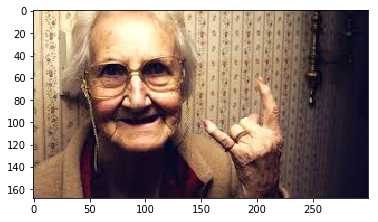

[7.8217255e-07]
download (2).jpg is old


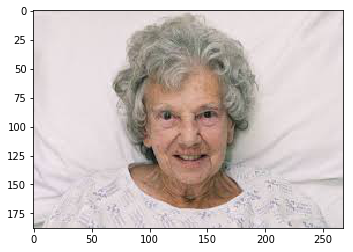

[0.]
download (3).jpg is old


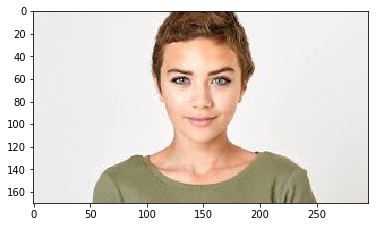

[1.]
download (4).jpg is young


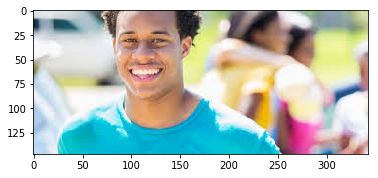

[1.]
download (6).jpg is young


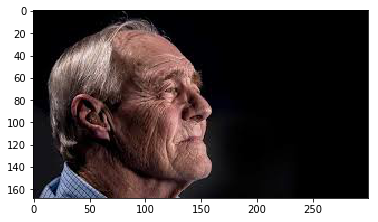

[0.]
download(1).jpg is old


In [8]:
#Testing the data on stock images of random people 
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

paths=os.path.join('C:\\Users\\Swapnil\\young2old-dataset\\test')
listing=os.listdir(paths)
for index,files in enumerate(listing):
    img = image.load_img(paths+'\\'+files, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    i=mpimg.imread(paths+'\\'+files)
    imgplot = plt.imshow(i)
    plt.show()
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(files + " is young")
    else:
        print(files+ " is old")
    
     
          